### Implementing K-means

In [1]:
import numpy as np
import pylab as plt
%matplotlib inline

Geneate some data with three clear clusters

In [2]:
cluster_means = [[0,0],[4,4],[-4,4]]
n_data = 20 # Number in each cluster
x = np.empty(shape=(0,2))
for i,m in enumerate(cluster_means):
    x = np.vstack((x,np.random.randn(n_data,2) + np.tile(m,(n_data,1))))

Plot the data

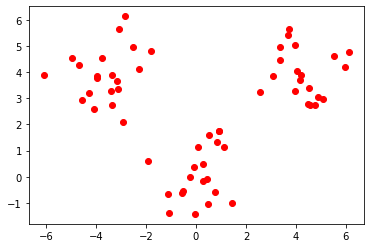

In [3]:
plt.figure()
plt.plot(x[:,0],x[:,1],'ro')

Initialise the things needed for k-means

In [4]:
# set K
K = 3
# Initialise the means
mu = np.random.randn(K,2)
# Set maximum number of iterations
max_its = 20
N = len(x)
z = np.zeros((N,K))
oldz = np.ones((N,K)) # just to make sure it is different from z in iteration 1

#TODO: initialise some colours, so it's easier to see what the iterations are doing 

Run the algorithm - plotting the state at each iteration

In [5]:
#YOUR CODE GOES HERE
    

In [54]:
class K_Means:
    
    def __init__(self, n_means):
        self.n_means = n_means
        
    def fit(self, X_train):
        number_features = X_train[0].size
        number_train_data = len(X_train)
        # generating random n means
        means_array = np.random.randn(self.n_means, number_features)
        dist = np.zeros((number_train_data, self.n_means))
        assigned_means = np.full((number_train_data,), fill_value=-2)
        assigned_means_old = np.full((number_train_data,), fill_value=-1)
        
        classes = {0:'ro',1:'bo', 2:'go'}
        plt.figure()
        for cl in classes:
            plt.plot(means_array[cl, 0], means_array[cl, 1], classes[cl], markersize=20)
        plt.plot(X_train[:,0],X_train[:,1],"yo")

        while True:
            for i in range(number_train_data):
                for j in range(self.n_means): 
                    dist[i, j] = ((X_train[i] - means_array[j])**2).sum()
                assigned_means[i] = dist[i].argmin()
            
            plt.figure()
            for cl in classes:
                plt.plot(means_array[cl, 0], means_array[cl, 1], classes[cl], markersize=20)
                pos = np.where(assigned_means == cl)[0]
                plt.plot(X_train[pos,0],X_train[pos,1],classes[cl])
            
            if np.all(assigned_means == assigned_means_old):
                break
            for i in range(self.n_means):
                means_index = assigned_means == i
                means_array[i] = X_train[means_index, :].mean(axis=0)
            assigned_means_old = assigned_means.copy()
                
        return means_array

array([[ 0.12609694,  0.12652259],
       [-3.6119492 ,  3.91977878],
       [ 4.30152218,  3.94348717]])

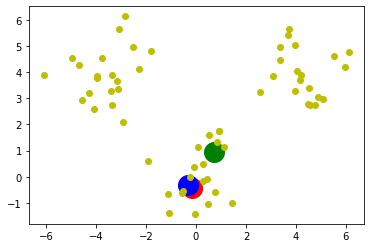

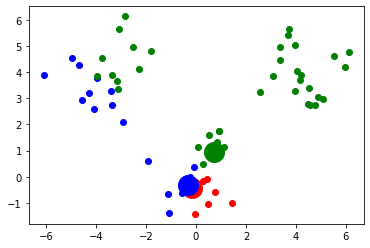

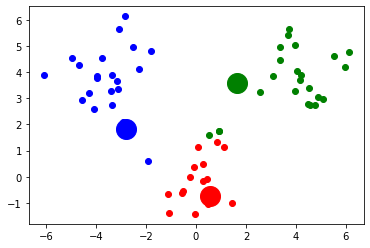

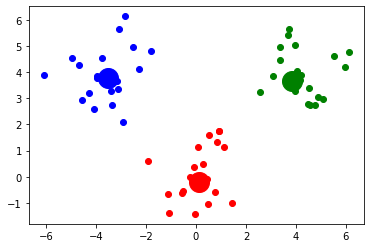

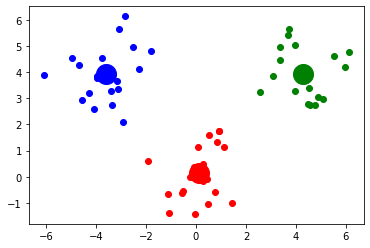

In [55]:
k_mean = K_Means(3)
k_mean.fit(x)

In [58]:
def k_means(num_cluster, X_train, max_iter):
    number_features = X_train[0].size
    number_train_data = len(X_train)

    # generating num_cluster random cluster means
    cluster_array = np.random.randn(num_cluster, number_features)
    dist = np.zeros((number_train_data, num_cluster))
    assigned_cluster_index = np.full((number_train_data,), fill_value=-2)
    assigned_cluster_index_old = np.full((number_train_data,), fill_value=-1)

    classes = {0:'ro',1:'bo', 2:'go'}
    plt.figure()
    for cl in classes:
        plt.plot(cluster_array[cl, 0], cluster_array[cl, 1], classes[cl], markersize=20)
    plt.plot(X_train[:,0],X_train[:,1],"yo")
    curr_iter = 0
    while curr_iter < max_iter:
        curr_iter += 1
        for i in range(number_train_data):
            for j in range(num_cluster): 
                dist[i, j] = ((X_train[i] - cluster_array[j])**2).sum()
            assigned_cluster_index[i] = dist[i].argmin()

#             plt.figure()
#             for cl in classes:
#                 plt.plot(cluster_array[cl, 0], cluster_array[cl, 1], classes[cl], markersize=20)
#                 pos = np.where(assigned_cluster_index == cl)[0]
#                 plt.plot(X_train[pos,0],X_train[pos,1],classes[cl])

            if np.all(assigned_cluster_index == assigned_cluster_index_old):
                break
        for i in range(num_cluster):
            cluster_bool_index = assigned_cluster_index == i
            print(cluster_bool_index, "\n" ,X_train[cluster_bool_index, :])
            cluster_array[i] = X_train[cluster_bool_index, :].mean(axis=0)
        assigned_cluster_index_old = assigned_cluster_index.copy()

        return cluster_array

[ True False False False False False  True  True False False  True False
 False False False False False  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True False  True False  True  True  True  True
  True  True  True False  True  True  True  True  True False False  True] 
 [[ 0.90804529  1.76789632]
 [ 0.85099509  1.3330108 ]
 [ 0.29151419  0.4795052 ]
 [ 1.10738385  1.15108544]
 [ 0.91003131  1.74100712]
 [ 0.51619182  1.57923131]
 [ 0.06635327  1.13577431]
 [ 6.10953981  4.78261108]
 [ 4.20647952  3.88460487]
 [ 4.76562925  2.72967307]
 [ 4.50226535  2.78047781]
 [ 4.52587231  3.389054  ]
 [ 4.87789735  3.05576418]
 [ 4.03708383  4.04703034]
 [ 4.55995095  2.75815925]
 [ 3.10233079  3.85161969]
 [ 5.5443651   4.60486893]
 [ 3.36779617  4.96838966]
 [ 5.96470824  4.20826453]
 [ 2.54321933  3.26038193]
 [ 3.35127028  4.47130587]
 [ 3.94553721  3.27287398]
 [ 3.98168467  5.03692622]
 [ 3.705626

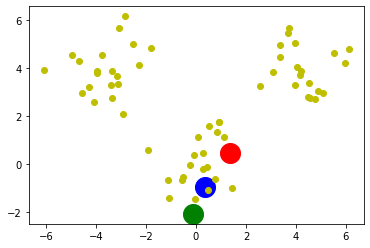

In [57]:
k_means(3, x, 1)